In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Affine2D
import matplotlib as mpl

from genSTEM.Model import drift_points, rotation_matrix, plot, \
extend_3D_ones, get_matrix, transform_points, transform_from_angle_strength

In [3]:
from genSTEM import ImageModel
#import cupy as cp
import numpy as np
cp = np
import matplotlib.pyplot as plt
from ase.io import read
from ase.build import make_supercell
atoms = read("0013687130_v6bxv2_tv0.1bxv0.0_d1.8z_traj.xyz")
atoms = make_supercell(atoms, np.diag((1,2,1)))
mask = atoms.positions[:,2] > 35
del atoms[mask]
atoms.rotate([1,0,0], (0,0,1))

from skimage.transform import warp
from matplotlib.transforms import Affine2D

atoms[1716].number = 60
atoms[1766].number = 60
jitter = 0

pixel_size = 0.5
drift_strength = 15e-4
drift_vector = [1,0]
centre_drift = True

m0 = ImageModel(atoms, pixel_size=pixel_size, vacuum=10.,
                scan_rotation=0, centre_drift=centre_drift)
img0 = m0.generate_cupy()

m1 = ImageModel(atoms,  pixel_size=pixel_size, vacuum=10.,
                drift_strength=drift_strength, 
                drift_vector=drift_vector,
                jitter_strength=jitter, 
                scan_rotation=0, centre_drift=centre_drift)
img1 = m1.generate_cupy()


m2 = ImageModel(atoms,  pixel_size=pixel_size, vacuum=10.,
                jitter_strength=jitter, 
                drift_vector=drift_vector,
                drift_strength=drift_strength, 
                scan_rotation=90, centre_drift=centre_drift)
img2 = m2.generate_cupy()

try:
    img0 = img0.get()
    img1 = img1.get()
    img2 = img2.get()
except:
    pass

In [4]:
from scipy.ndimage import affine_transform
from matplotlib.transforms import Affine2D

In [5]:
from scipy.misc import face
f = face(True)

In [6]:
plt.close('all')

In [7]:
# p0 = drift_points(drift_strength=0).reshape((-1, 2), order='F')
# for strength in np.arange(0.0, 0.5, 0.1):
#     p1 = drift_points(drift_strength=strength).reshape((-1, 2), order='F')
#     M = np.round(get_matrix(p0, p1), 10)
#     fig, ax = plt.subplots()
#     ax.scatter(*p1.T, c=np.arange(len(p1.T[0])), label=M[0,0])
#     ax.legend()
#     ax.invert_yaxis()

In [8]:
strength = 15e-4
p0 = drift_points(shape=img0.shape, drift_strength=0).reshape((-1, 2), order='F')
p1 = drift_points(shape=img0.shape, drift_strength=strength).reshape((-1, 2), order='F')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(8,2))
ax1.scatter(*p0.T, c=np.arange(len(p0.T[0])))
ax1.invert_yaxis()
ax1.axis('equal')
ax2.scatter(*p1.T, c=np.arange(len(p1.T[0])))
ax2.invert_yaxis()
ax2.axis('equal')

ax3.imshow(img0, aspect="auto")
ax4.imshow(img1, aspect="auto")

plt.tight_layout()

M = np.round(get_matrix(p0, p1), 10)
print(M)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[[ 0.9985 -0.1695 -0.0015]
 [-0.      1.     -0.    ]
 [-0.     -0.      1.    ]]


AttributeError: __delete__

<Figure size 576x144 with 4 Axes>

In [9]:
# strength = 0.1
# angle = 0
# img0 = drift_points(shape=(10,10), drift_rad=angle, drift_strength=0)

# for angle in np.linspace(0, 2*np.pi, 4, endpoint=False):
#     img1 = drift_points(shape=(10,10), drift_rad=angle, drift_strength=strength)
#     M = np.round(get_matrix(img0.reshape((-1, 2)), img1.reshape((-1, 2))), 4)
#     #m = np.round(transform_from_angle_strength(angle, strength)[0], 4)
#     print(M)

In [10]:
driftangle = 0
strength = 0.1
shearangle = np.arctan(strength)
shx, shy = np.array()
scale = 1 + strength
a = (
    Affine2D()
    #.translate(-sx, -sy)
    .scale(
        sx = 1 + scale*np.sin(driftangle),
        sy = 1# + scale*np.cos(driftangle)
    )
    .skew(
        xShear=np.tan(shearangle)*np.cos(driftangle), 
        yShear=0#np.tan(shearangle)*np.sin(driftangle))
    )
    #.translate(sx, sy)
)
a.get_matrix()

TypeError: array() missing required argument 'object' (pos 1)

5.759586531581287


<Figure size 432x288 with 0 Axes>

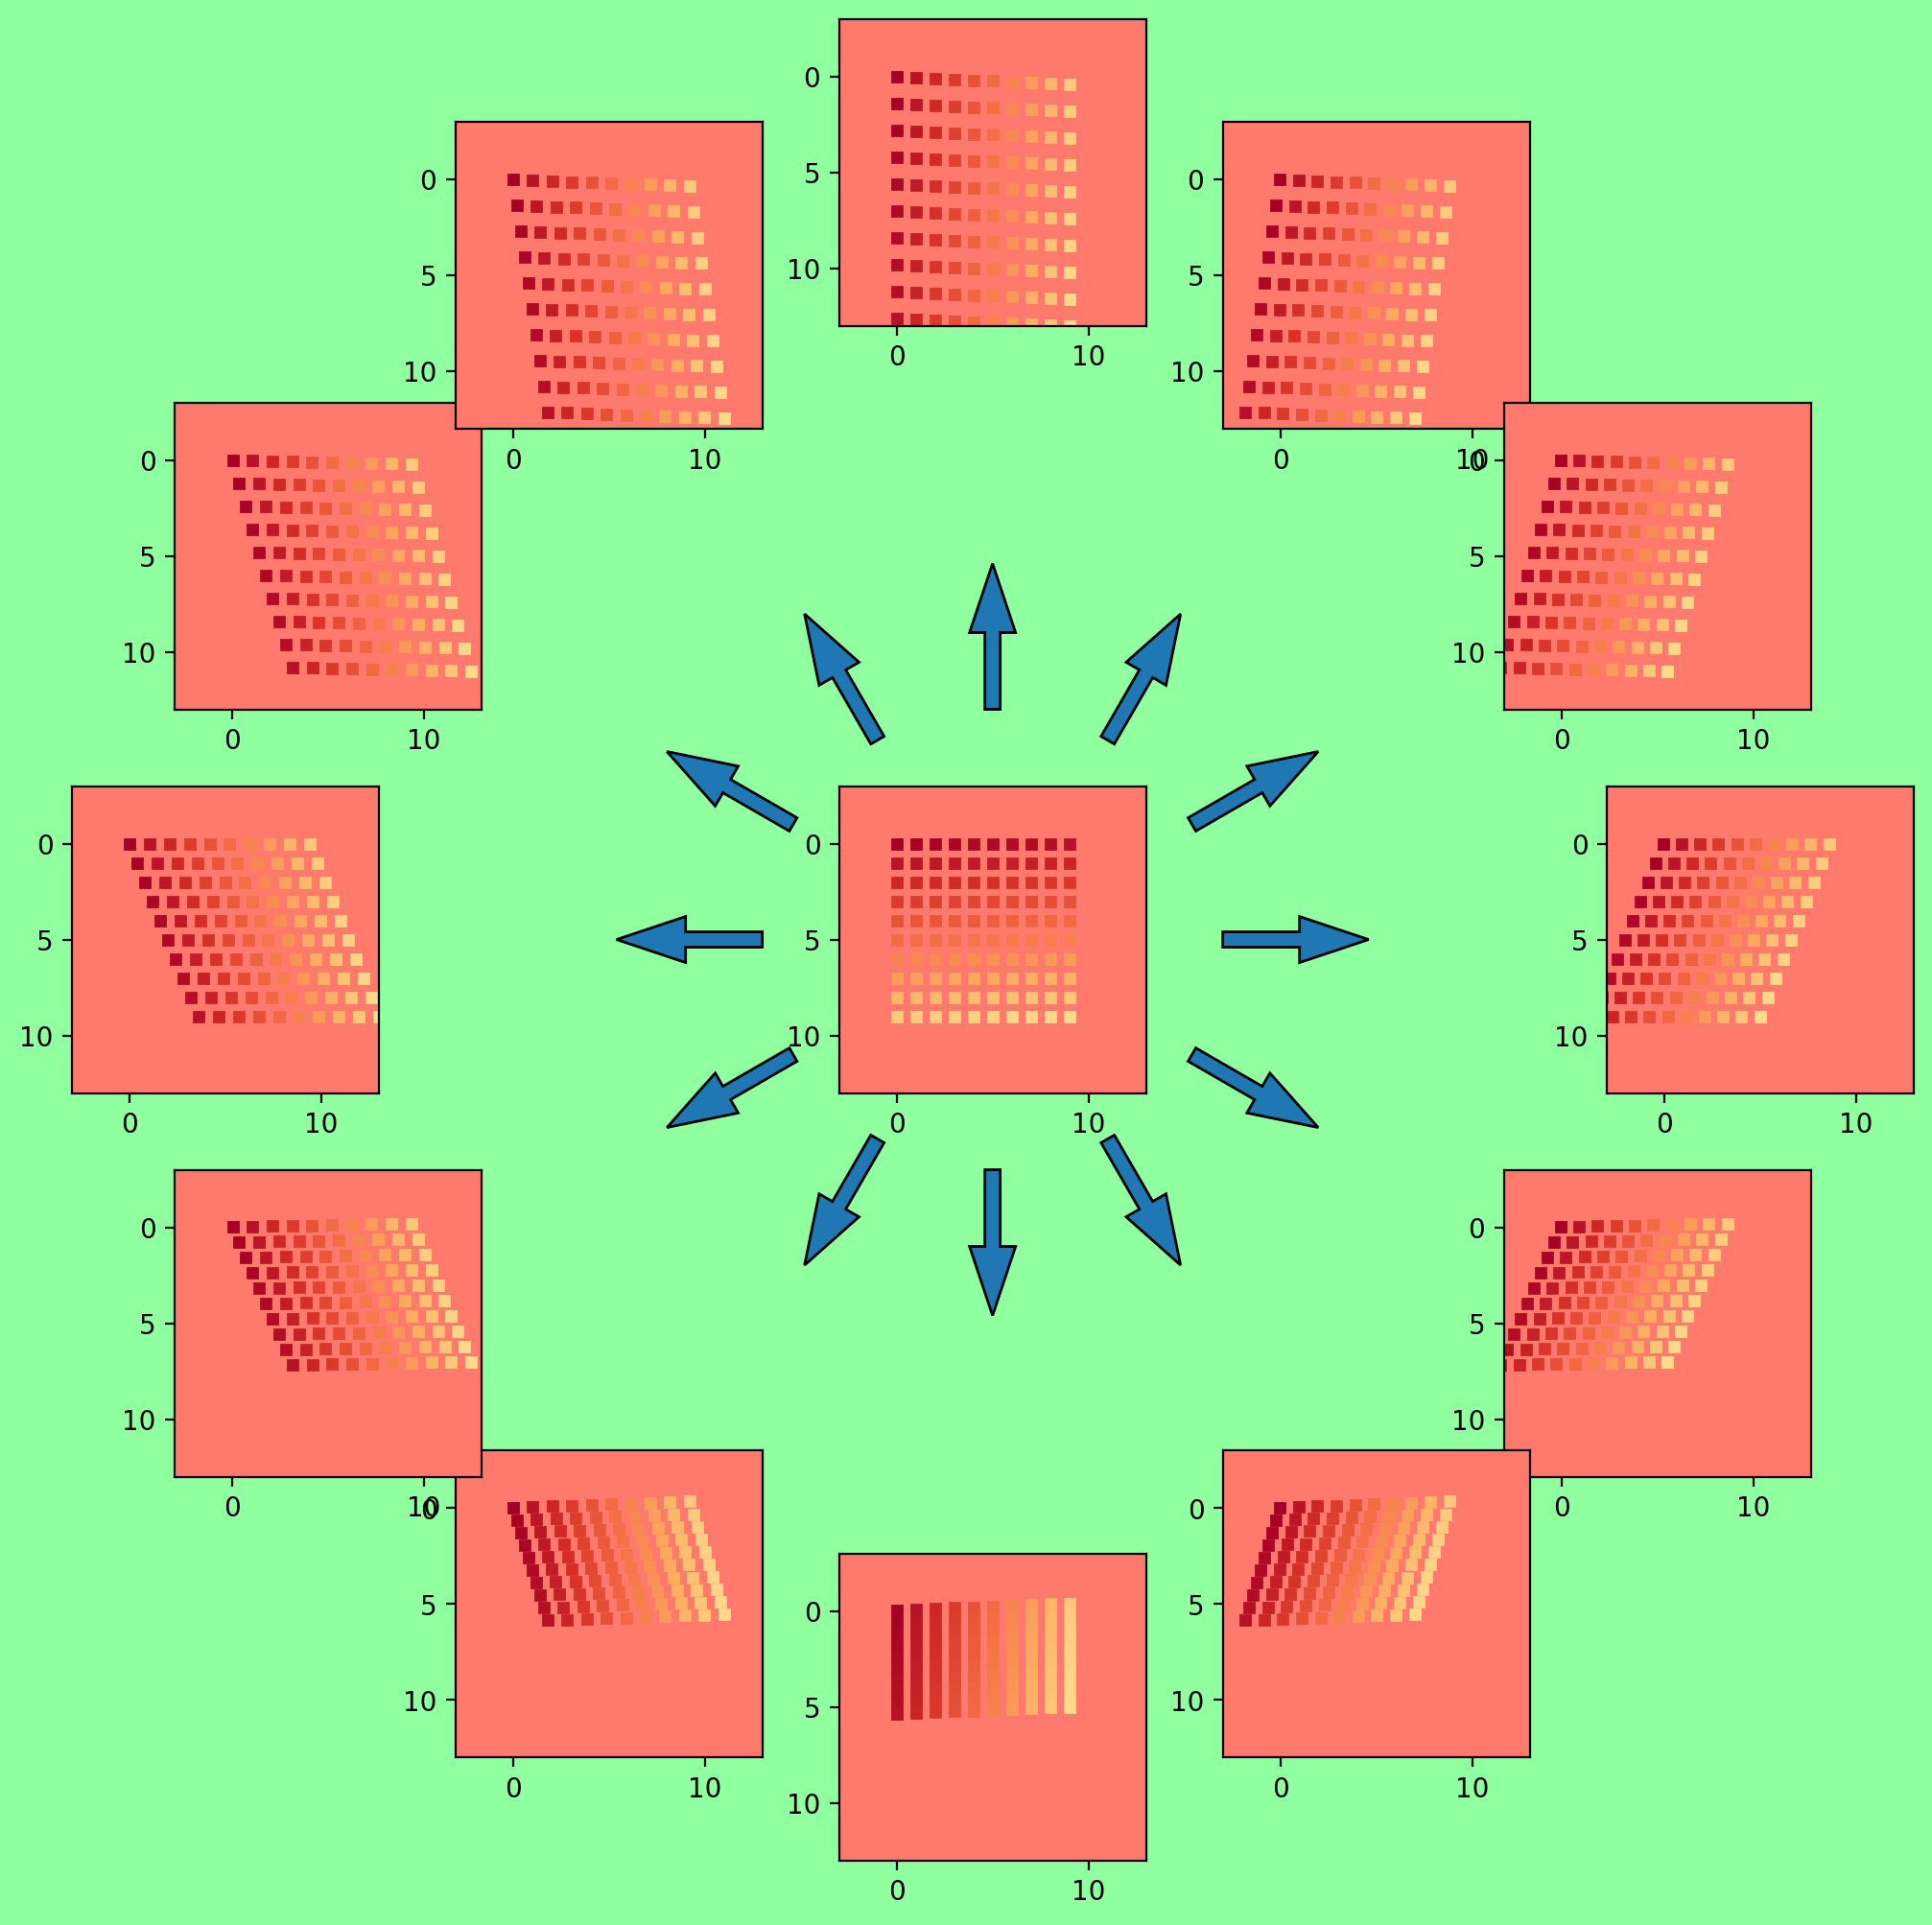

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.close('all')
fig = plt.figure()


fig = plt.figure(figsize=(8, 8), dpi=200)
fig.patch.set_facecolor('xkcd:mint green')

#fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

r = 1
strength = 0.04
shape = (10, 10)

height = 0.2
width = 0.2

ax = fig.add_axes((r/2 - width/2, r/2-height/2, width, height))
img0 = drift_points(shape = shape, drift_strength=0)
mn = img0.reshape((-1, 2)).min(0) - 3
mx = img0.reshape((-1, 2)).max(0) + 4
lim = ((mn[0], mx[0]), (mx[1], mn[1]))
plot(img0, ax, lim = lim)
#ax.axis('off')
ax.set_facecolor('xkcd:salmon')

for i, angle in enumerate(np.linspace(0, 2*np.pi, 12, endpoint=False)):
    left =   r*np.cos(angle) / 2 + r/2
    bottom = r*np.sin(-angle) / 2 + r/2
    
    arrstartx = 0.3*np.cos(angle) / 2 + r/2
    arrstarty = 0.3*np.sin(-angle) / 2 + r/2
    
    arrendx = 0.4*np.cos(angle) / 2 + r/2
    arrendy = 0.4*np.sin(-angle) / 2 + r/2

    arrow = mpl.patches.FancyArrow(
        arrstartx, arrstarty, 
        arrendx - arrstartx, 
        arrendy - arrstarty, 
        transform=fig.transFigure, 
        figure=fig,
        width=0.01
    
    )

    fig.add_artist(arrow)
    
    ax = fig.add_axes((left-width/2, bottom-height/2, width, height))
    img = drift_points(shape=shape, drift_deg=np.rad2deg(angle), drift_strength=strength)
    M = get_matrix(img0.reshape((-1, 2)), img.reshape((-1, 2)))
    points = transform_points(img0.reshape((-1,2)), M)
    plot(points, ax, lim=lim)#((-5, 20), (-5, 20)))
    #ax.axis('off')
    ax.set_facecolor('xkcd:salmon')
print(angle)

In [120]:
from importlib import reload
from genSTEM import Model

reload(Model)

shape = (100,100)
strength =0.2/shape[0]
angle1 = 0
angle2 = 90

img0 = drift_points(shape=shape, drift_deg=0).reshape((-1, 2), order='F')
img1 = drift_points(shape=shape, drift_deg=angle1, drift_strength=strength).reshape((-1, 2), order='F')
img2 = drift_points(shape=shape, drift_deg=angle2, drift_strength=strength).reshape((-1, 2), order='F')

M1 = get_matrix(img0, img1)
M2 = get_matrix(img0, img2)

m1, m2 = Model.transform_from_angle_strength4(
    drift_rad,
    strength, 
    angle_diff=np.deg2rad(angle2 - angle1), 
    x_len=shape[0])

# print(np.round(M1, 4))
# print(np.round(m1, 4))
# print(np.round(M2, 4))
# print(np.round(m2, 4))

print(np.round(M1 - m1, 9))
print()
print()
print(np.round(M2 - m2, 9))

TypeError: drift_points() got an unexpected keyword argument 'drift_deg'

In [112]:
np.round(M1, 4)

array([[ 0.9981, -0.19  , -0.0019],
       [-0.    ,  1.    , -0.    ],
       [-0.    , -0.    ,  1.    ]])

In [108]:
strength

0.002

In [103]:
np.arctan(0)

0.0

In [101]:
fig, AX = plt.subplots(ncols=3, figsize = (10, 4), dpi=100)
(ax1, ax2, ax3) = AX

ax1.scatter(*img0.T, c=np.arange(len(img0)))
ax2.scatter(*img1.T, c=np.arange(len(img1)))
ax3.scatter(*img2.T, c=np.arange(len(img2)))

[ax.invert_yaxis() for ax in AX]
[ax.axis('equal') for ax in AX];

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [89]:
fig, AX = plt.subplots(ncols=3, figsize = (10, 4), dpi=100)
(ax1, ax2, ax3) = AX

ax1.scatter(*img0.T, c=np.arange(len(img0)))
ax2.scatter(*transform_points(img1, np.linalg.inv(M1)).T, c=np.arange(len(img1)))
ax3.scatter(*transform_points(img2, np.linalg.inv(M2)).T, c=np.arange(len(img2)))

[ax.invert_yaxis() for ax in AX]
[ax.axis('equal') for ax in AX];



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
img1.shape

(10, 10, 2)

In [5]:
from importlib import reload
import genSTEM.Model
reload(genSTEM.Model)
from genSTEM import Model
from ipywidgets import Output, HBox

strength = 0.4 / shape[0]
deg = 0
angle = np.deg2rad(deg)
shape = (20, 20)
rotation_deg = -90

img0 = drift_points(shape = shape, drift_strength=0)

o1, o2, o3, o4 = Output(), Output(), Output(), Output()

img1 = drift_points(shape=shape, drift_rad=angle, drift_strength=strength)
M = get_matrix(img0.reshape((-1, 2)), img1.reshape((-1, 2)))
m1, m2 = Model.transform_from_angle_strength3(angle, strength, angle_diff = np.deg2rad(rotation_deg - deg), x_len=img0.shape[0], )


with o1:
    print(np.round(M-m1, 4))
# with o2: 
#     print(np.round(m ,4))

print()
angle2 = np.deg2rad(deg + rotation_deg)
img2 = drift_points(shape=shape, drift_rad=angle2, drift_strength=strength)
M = get_matrix(img0.reshape((-1, 2)), img2.reshape((-1, 2)))
#m = Model.transform_from_angle_strength3(angle=angle2, strength=strength, x_len=img0.shape[0])[0]
with o3:
    print(np.round(M-m2, 4))
    
# with o4: 
#     print(np.round(m ,4))
    
display(HBox([o1, o2]))
display(HBox([o3, o4]))

NameError: name 'shape' is not defined

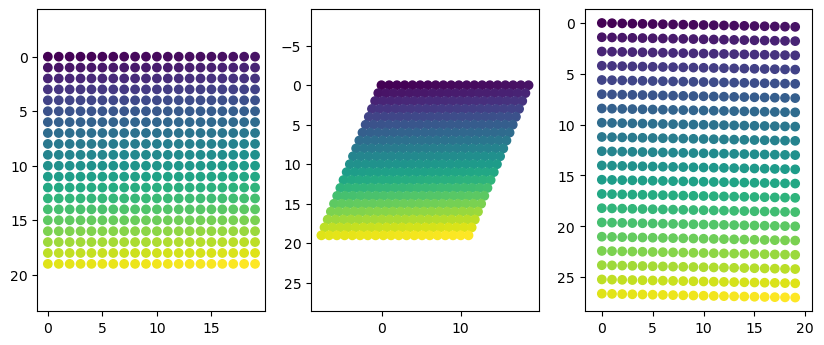

In [75]:
fig, AX = plt.subplots(ncols=3, figsize = (10, 4), dpi=100)
(ax1, ax2, ax3) = AX

a,b,c = img0.reshape((-1, 2), order='F').T, img1.reshape((-1, 2), order='F').T, img2.reshape((-1, 2), order='F').T
ax1.scatter(*a, c=np.arange(len(a[1])))
ax2.scatter(*b, c=np.arange(len(b[1])))
ax3.scatter(*c, c=np.arange(len(c[1])))

[ax.invert_yaxis() for ax in AX]
[ax.axis('equal') for ax in AX];

In [ ]:
deg = 90
angle = np.deg2rad(deg)
strength = 0.1

print(m)

In [ ]:
np.sin(np.deg2rad(30))

In [ ]:
plt.figure()
plt.scatter()

In [ ]:
np.sin(np.pi/4)

In [ ]:
np.sin(np.deg2rad(45)) * (1 - strength)

In [ ]:
strength